epoch 0: cost = 0.702845
epoch 20: cost = 0.694398
epoch 40: cost = 0.693307
epoch 60: cost = 0.693167
epoch 80: cost = 0.693150
epoch 100: cost = 0.693148
epoch 120: cost = 0.693147
epoch 140: cost = 0.693147
epoch 160: cost = 0.693147
epoch 180: cost = 0.693147
epoch 200: cost = 0.693147
epoch 220: cost = 0.693147
epoch 240: cost = 0.693147
epoch 260: cost = 0.693147
epoch 280: cost = 0.693147
epoch 300: cost = 0.693147
epoch 320: cost = 0.693147
epoch 340: cost = 0.693147
epoch 360: cost = 0.693147
epoch 380: cost = 0.693147
epoch 400: cost = 0.693147
epoch 420: cost = 0.693147
epoch 440: cost = 0.693147
epoch 460: cost = 0.693147
epoch 480: cost = 0.693147
epoch 500: cost = 0.693147
epoch 520: cost = 0.693147
epoch 540: cost = 0.693147
epoch 560: cost = 0.693147
epoch 580: cost = 0.693147
epoch 600: cost = 0.693147
epoch 620: cost = 0.693147
epoch 640: cost = 0.693147
epoch 660: cost = 0.693147
epoch 680: cost = 0.693147
epoch 700: cost = 0.693147
epoch 720: cost = 0.693147
epoch 7

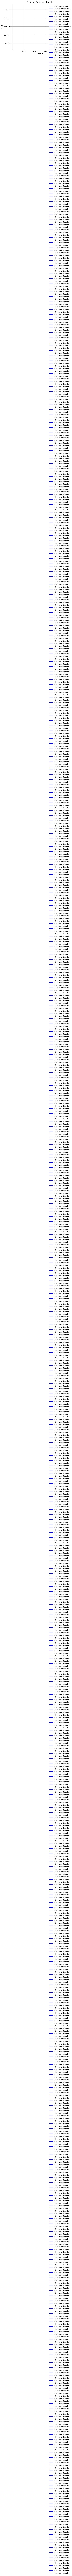

In [13]:
import numpy as np
import matplotlib.pyplot as plt

L = 3
n = [2, 3, 3, 1]
W1 = np.random.randn(n[1], n[0])
W2 = np.random.randn(n[2], n[1])
W3 = np.random.randn(n[3], n[2])
b1 = np.random.randn(n[1], 1)
b2 = np.random.randn(n[2], 1)
b3 = np.random.randn(n[3], 1)

def prepare_data():
    X = np.array([
        [150, 70], [254, 73], [312, 68], [120, 60], [154, 61],
        [212, 65], [216, 67], [145, 67], [184, 64], [130, 69]
    ])
    y = np.array([0,1,1,0,0,1,1,0,1,0])
    m = X.shape[0]
    A0 = X.T
    Y = y.reshape(n[L], m)
    return A0, Y, m

A0, Y, m = prepare_data()

def g(z): return 1 / (1 + np.exp(-z))

def cost(y_hat, y):
    y_hat = np.clip(y_hat, 1e-8, 1 - 1e-8)
    losses = -((y * np.log(y_hat)) + (1 - y) * np.log(1 - y_hat))
    return np.sum(losses) / y.shape[1]

def feed_forward(A0):
    Z1 = W1 @ A0 + b1
    A1 = g(Z1)
    Z2 = W2 @ A1 + b2
    A2 = g(Z2)
    Z3 = W3 @ A2 + b3
    A3 = g(Z3)
    cache = {"A0": A0, "A1": A1, "A2": A2}
    return A3, cache

def backprop_layer_3(y_hat, Y, m, A2, W3):
    dC_dZ3 = (1/m) * (y_hat - Y)
    dC_dW3 = dC_dZ3 @ A2.T
    dC_db3 = np.sum(dC_dZ3, axis=1, keepdims=True)
    dC_dA2 = W3.T @ dC_dZ3
    return dC_dW3, dC_db3, dC_dA2

def backprop_layer_2(dC_dA2, A1, A2, W2):
    dZ2 = dC_dA2 * A2 * (1 - A2)
    dC_dW2 = dZ2 @ A1.T
    dC_db2 = np.sum(dZ2, axis=1, keepdims=True)
    dC_dA1 = W2.T @ dZ2
    return dC_dW2, dC_db2, dC_dA1

def backprop_layer_1(dC_dA1, A1, A0, W1):
    dZ1 = dC_dA1 * A1 * (1 - A1)
    dC_dW1 = dZ1 @ A0.T
    dC_db1 = np.sum(dZ1, axis=1, keepdims=True)
    return dC_dW1, dC_db1

def train():
    global W3, W2, W1, b3, b2, b1
    epochs = 1000
    alpha = 0.1
    costs = []
    for e in range(epochs):
        y_hat, cache = feed_forward(A0)
        error = cost(y_hat, Y)
        costs.append(error)

        dW3, db3, dA2 = backprop_layer_3(y_hat, Y, m, cache["A2"], W3)
        dW2, db2, dA1 = backprop_layer_2(dA2, cache["A1"], cache["A2"], W2)
        dW1, db1 = backprop_layer_1(dA1, cache["A1"], cache["A0"], W1)

        W3 -= alpha * dW3
        W2 -= alpha * dW2
        W1 -= alpha * dW1
        b3 -= alpha * db3
        b2 -= alpha * db2
        b1 -= alpha * db1

        plt.plot(e, error, label="Cost over Epochs", color='blue')
        if e % 20 == 0:
            print(f"epoch {e}: cost = {error:.6f}")
    return costs

costs = train()

plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Training Cost over Epochs")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#back prop